# Exercise - Binary Classification with Perceptron

Classify vehicle mileage as high or low based on two features, weight and horsepower using Perceptron model. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from io import StringIO
dataset =StringIO('''
weight,horsepower,mileage
1.4,43,1
1.5,8,0
2.71,44,1
3.55,23,0
2.5,15,0
2.9,19,0
3.85,112,1
3.96,87,1
4.62,108,1
4.7,21,0
2.67,34,1
2.5,20,0
1.932,12, 0
4.8,48,1
1.321,32,1
1.9013,52,1
4.13,19,0
2.8,29,0
''')
df = pd.read_csv(dataset)
df.head(10)

,weight,horsepower,mileage
0,1.40,43,1
1,1.50,8,0
2,2.71,44,1
3,3.55,23,0
4,2.50,15,0
5,2.90,19,0
6,3.85,112,1
7,3.96,87,1
8,4.62,108,1
9,4.70,21,0


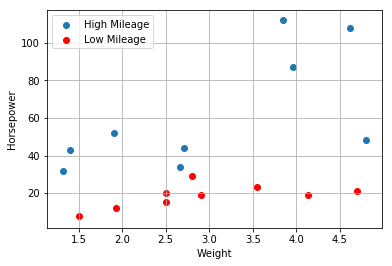

In [3]:
high_mileage = df[df['mileage'] == 1]
low_mileage = df[df['mileage'] == 0]
plt.scatter(high_mileage['weight'], high_mileage['horsepower'], label='High Mileage')
plt.scatter(low_mileage['weight'], low_mileage['horsepower'], color='r', label='Low Mileage')
plt.xlabel("Weight")
plt.ylabel("Horsepower")
plt.legend()
plt.grid()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['weight', 'horsepower']], df['mileage'], \
                                                    test_size=0.2, random_state=3)

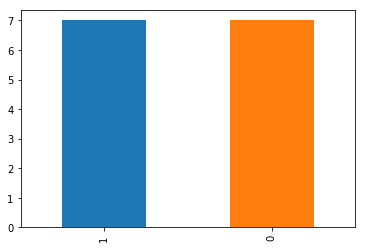

In [6]:
y_train.value_counts().plot(kind='bar')

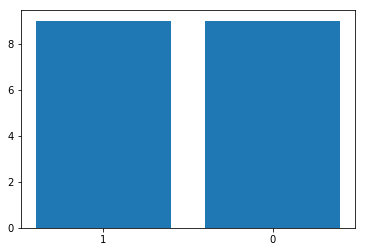

In [7]:
objects = df['mileage'].value_counts().keys()
plt.bar(range(len(objects)),df['mileage'].value_counts(), align="center")
plt.xticks(range(len(objects)), objects)
plt.show()

In [8]:
from sklearn.linear_model import Perceptron
new_c = Perceptron(max_iter=100)
new_model = new_c.fit(X_train, y_train)

In [9]:
predictions = new_model.predict(X_test)
print("Obtained prediction", predictions)
print("Actual prediction", y_test.tolist())

Obtained prediction [0 1 0 1]
Actual prediction [0, 1, 0, 1]


In [10]:
from sklearn import metrics
metrics.confusion_matrix(y_test, predictions)

array([[2, 0],
       [0, 2]], dtype=int64)

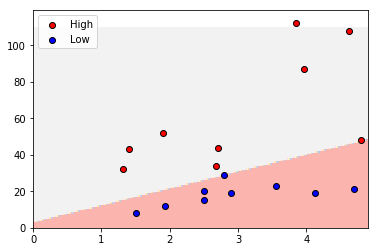

In [14]:
import numpy as np 
x_min, x_max = 0, 5
y_min, y_max = 0, 130

xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))
Z = new_model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

plt.scatter(high_mileage['weight'], high_mileage['horsepower'], color='r', label='High', edgecolors='black')
plt.scatter(low_mileage['weight'], low_mileage['horsepower'], color='b', label='Low', edgecolors='black')
plt.legend()

In [12]:
input_values = [[2, 20], [3.3, 29], [1.21, 13], [5.32, 100], [1.23, 40], [4.8, 49]]
new_model.predict(input_values)

array([0, 0, 0, 1, 1, 1], dtype=int64)

In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(Perceptron(max_iter=100), df[['weight', 'horsepower']], df['mileage'], cv=6)
print("Cross-validated scores:", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-validated scores: [0.75 1.   1.   0.5  1.   0.5 ]
Accuracy: 0.79 (+/- 0.45)
